In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

In [20]:
Test_Data = np.array([ 0.        ,  0.        , -0.31142942, -0.55388061, -1.00577481,
       -0.89650068, -0.26682387, -1.87874156,  0.43489814, -0.49173335,
        0.30693148, -0.15826985,  0.1338759 , -1.7804752 , -1.13407565,
       -0.55911228, -0.08222177,  0.84957125, -0.6478303 ,  1.01844664,
        0.21440724,  1.0308487 ,  0.04893845, -0.57290784, -1.26407468,
        0.44001649,  0.95501518, -0.27276771, -0.48359706, -0.23766364,
       -1.06478442, -0.46170487, -0.24492401, -0.11204458, -0.28663323,
        0.37374825, -0.16084207,  1.60242704,  0.06382985,  1.73115819,
       -0.75377207,  0.75468433, -0.00653218,  0.92351619,  0.87761746,
       -1.90729023, -0.89021613, -1.11008217,  0.58440861,  1.38171852,
       -0.5943608 ,  0.63683865,  0.35464418, -1.17990928,  0.42555112,
       -0.77250798,  1.55164398, -0.12798666,  1.63909714, -0.45523738,
        0.74177512,  0.10602088, -1.78690987, -0.62617909,  0.84651274,
       -0.0413959 , -1.16030311, -0.64429848,  0.15709621, -1.20243381,
        0.79105964, -0.95740294,  1.57566179, -1.4154506 ,  0.07840043,
       -1.6416487 , -0.73655598, -0.67247959,  0.24201919,  0.66243631,
       -0.03513426, -0.63331287,  0.66496478,  0.63616377,  0.00743138,
        0.57357969,  0.46289125, -0.87258513,  0.99894014, -0.50851296,
       -0.3985653 ,  0.36175301, -0.21991661, -0.0688258 ,  0.61429687,
        0.99484197, -0.27623515,  0.36309977, -0.17976237])


**1.Histogram**

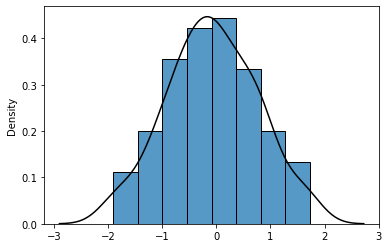

In [21]:
sns.histplot(Test_Data,stat='density')
sns.kdeplot(Test_Data,color='k')

plt.show()

**2.Q-Q Plot**

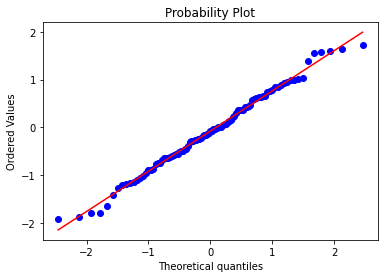

In [22]:
stats.probplot(Test_Data, dist="norm", plot=plt)
plt.show()

**3.Shapiro-Wilk’s Test**

In [25]:
stat, p = stats.shapiro(Test_Data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha_SHW = 0.05
if p > alpha_SHW:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.627
Sample looks Gaussian (fail to reject H0)


**4.D’Agostino’s K2 Test**

In [26]:
stat, p = stats.normaltest(Test_Data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.373, p=0.830
Sample looks Gaussian (fail to reject H0)


**Anderson-Darling**

In [27]:
result = stats.anderson(Test_Data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.165
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.758, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.052, data looks normal (fail to reject H0)
